# Is there a genre with low market share and high ROI that Microsoft can tap into? 

## We begin by importing the data

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns
%matplotlib inline 

## We will create an alias for the csv that we have cleaned.


In [3]:
genre_ROI_df = pd.read_csv('zippedData/join_df_modified.csv')

In [4]:
genre_ROI_df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,...,Mystery,Horror,Animation,History,Comedy,Romance,Sci-Fi,Western,Family,Sport
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### We will drop any columns unnecessary to what we want to plot, starting with this 'Unnamed: 0'

In [6]:
genre_ROI_df.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
genre_ROI_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,overall_worldwide_profitability,overall_domestic_profitability,worldwide_ROI,domestic_ROI,...,Mystery,Horror,Animation,History,Comedy,Romance,Sci-Fi,Western,Family,Sport
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,335507625,553.257713,78.942971,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,-169536125,154.667286,-41.289850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-307237650,-57.210757,-87.782186,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,128405868,324.384139,38.840250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,378815482,582.711400,126.271827,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## We have already joined the two tables we will be using today during our data cleaning.
- The two tables:
    - The imdb_title_basics_df
    - The tmdb_budgets_df
- These two dataframes match best because they give the greatest combination of films with their gross and production budget.
    - It is this information that allowed us to determine the ROI for each genre. 

# Time to plot our data!

## In our initial plot, we examine the worldwide ROI of each genre that has between 2-6% of the market share as determined by our data.
- We determined market share by dividing the count of each genre by the total number of films in our dataframe.
- We feel that it is important to note that we are looking at such a small market share because we want to find a niche that Microsoft can fit into and still obtain a sizable ROI for its investors. 
- We want to explode onto the scene! 
- Below, we create a list of genres and, from there, create a dictionary to iterate through with genres as the key and ROI as the value.
- We will use this to create a boxplot.

In [146]:
genres = ["Animation", "Fantasy", "Sci-Fi", "Family", "Mystery", "Biography", 
          "Crime", "Romance", "Adventure", "Horror"]
dic = {}
dic["genres"] = []
dic["roi"] = []
for index, row in genre_ROI_df.iterrows():
    for i in genres:
        if row[i] == 1:
            dic["genres"].append(i)
            dic["roi"].append(row['worldwide_ROI'])

In [150]:
df = pd.DataFrame(dic)
print(df)

         genres          roi
0        Horror   553.257713
1       Fantasy   154.667286
2     Adventure   154.667286
3        Sci-Fi   -57.210757
4     Adventure   -57.210757
...         ...          ...
5848     Horror  -100.000000
5849     Horror  1287.110000
5850     Sci-Fi  -100.000000
5851     Horror  -100.000000
5852     Horror  -100.000000

[5853 rows x 2 columns]


### Here we will use a box plot to show distribution of worldwide ROI for each genre as mentioned above. As you can see from the graph below, the ROI seems to be distributed nicely in the genres Animation, Adventure, and Fantasy.
This boxplot sorted the genres from most prevalent to least prevalent. Horror is close to 6% market share according to our data while animation is closer to 2%. A few of the genres (horror, mystery, romance) have a distribution that skews in favor of a high ROI but we want to take a look at those genres whose median ROI is quite high and whose data distributes more symmetrically.

To be clear about the boxplot: 

We set showfliers to False in the code below because the outliers for most of the genres were such that if we included them, the plot would be incredibly flat. This will be the case in our second plot as well when we take a closer look at our top three genres.The whiskers on either end of the box display the maximum and minimum values, barring any outliers, however the values within the box are most pertinent to our interests as they display 75% of our datasets.

While some genres, like horror, romance, and mystery, may have some substantial maximum values, we decided not to consider them in our final results as we feel that the most important data lies with the median ROI. Diving into an underused genre may already carry its own risks, we want to make sure we can predict a solid ROI for our stakeholders.

([<matplotlib.axis.YTick at 0x256b0c2c198>,
 <a list of 11 Text yticklabel objects>)

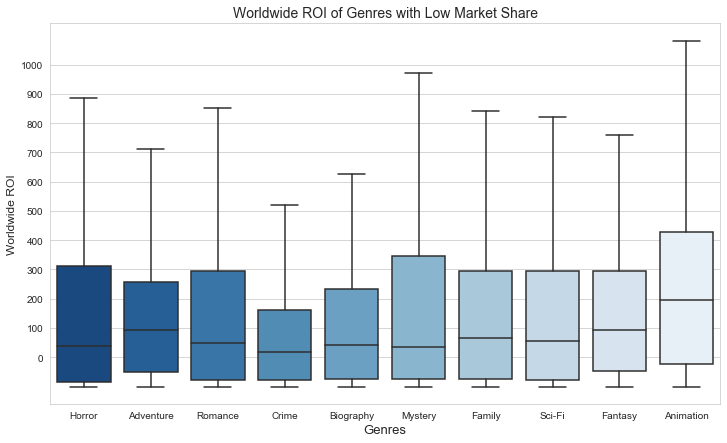

In [156]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
b=box_plot=sns.boxplot(data=df, x='genres', y='roi', 
                       order=["Horror", "Adventure", "Romance", 
                              "Crime", "Biography", "Mystery", 
                              "Family", "Sci-Fi", "Fantasy", "Animation"], 
                       palette="Blues_r", showfliers=False)
b.axes.set_title("Worldwide ROI of Genres with Low Market Share",fontsize=14)
b.set_xlabel("Genres",fontsize=13)
b.set_ylabel("Worldwide ROI",fontsize=12)
b.tick_params(labelsize=10)
yticks = np.linspace(start=0, stop=100*10, num=11)
plt.yticks(yticks)

## Below, we create another boxplot, this time with our most relevant information. We have discovered the three highest median ROIs with a small market share. 

These are the genres we feel should be a primary focus for Microsoft in their new venture. We organized our plot below by increasing median ROI as well as increasing distribution size and maximum value. 

In [148]:
df1 = pd.DataFrame(dic)
print(df1)

         genres          roi
0        Horror   553.257713
1       Fantasy   154.667286
2     Adventure   154.667286
3        Sci-Fi   -57.210757
4     Adventure   -57.210757
...         ...          ...
5848     Horror  -100.000000
5849     Horror  1287.110000
5850     Sci-Fi  -100.000000
5851     Horror  -100.000000
5852     Horror  -100.000000

[5853 rows x 2 columns]


([<matplotlib.axis.YTick at 0x256b1b40828>,
 <a list of 11 Text yticklabel objects>)

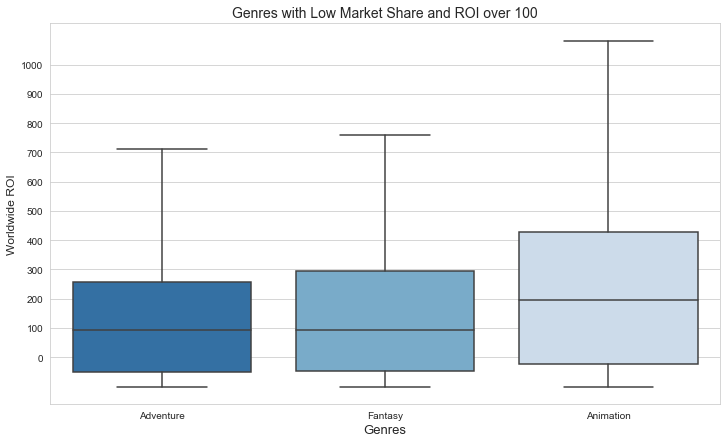

In [154]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
b=box_plot=sns.boxplot(data=df1, x='genres', y='roi', order=['Adventure', 'Fantasy', 'Animation'], palette="Blues_r", 
                 showfliers=False)
b.axes.set_title("Genres with Low Market Share and ROI over 100",fontsize=14)
b.set_xlabel("Genres",fontsize=13)
b.set_ylabel("Worldwide ROI",fontsize=12)
b.tick_params(labelsize=10)
yticks = np.linspace(start=0, stop=100*10, num=11)
plt.yticks(yticks)

# Conclusion and Future Research Suggestions

It may not come as a surprise that animation has a reliably high ROI as there have been a great many famous successes by studios like Disney and Dreamworks, its median ROI, 200, is twice as high as adventure and fantasy! In the future, it would be interesting to return to our analysis here and see if we can determine if we could obtain an even higher ROI by combining these genres together.